In [9]:
# %pip install catboost

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Preprocessed_Bank_Customer_Churn_Prediction.csv')

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

X = df[features]
y = df['churn']

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

def auc_plot(model, X_test, y_test):
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def evaluation(model, X_test, y_test):
    # 예측 결과
    y_pred = model.predict(X_test)

    # 정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(f"정확도: {accuracy * 100:.4f}%")

    # 혼동 행렬
    cm = confusion_matrix(y_test, y_pred)
    print("혼동 행렬:\n", cm)

    # 정밀도: 정밀도는 예측한 클래스 1 중에서 실제로 클래스 1인 비율
    precision = precision_score(y_test, y_pred)
    print(f"정밀도: {precision:.4f}")

    # 재현율: 재현율은 실제 클래스 1 중에서 모델이 클래스 1로 예측한 비율
    recall = recall_score(y_test, y_pred)
    print(f"재현율: {recall:.4f}")

    # F1 점수: F1 점수는 정밀도와 재현율의 조화 평균, 두 지표의 균형을 맞추기 위한 지표
    f1 = f1_score(y_test, y_pred)
    print(f"F1 점수: {f1:.4f}")
    
    # ROC 곡선과 AUC
    auc_plot(model, X_test, y_test)

In [12]:
# 'balance'와 'estimated_salary' 컬럼을 skewed_columns 리스트에 추가
skewed_columns = ['age', 'balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
skewed_columns = ['balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
# skewed_columns = ['age', 'balance', 'estimated_salary']  # 'balance'와 'estimated_salary' 추가

# log1p 변환 함수
def log1p_transform_columns(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p는 log(x+1)
    return df

# log1p 변환 수행
df = log1p_transform_columns(df, skewed_columns)

df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,6.429719,0,1,42,2,0.000000,1,1,1,11.526334,1
1,6.411818,2,1,41,1,11.336294,1,0,1,11.631096,0
2,6.220590,0,1,42,8,11.980813,3,1,0,11.643362,1
3,6.551080,0,1,39,1,0.000000,2,0,0,11.449215,0
4,6.746412,2,1,43,2,11.740155,1,1,1,11.278280,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 정규화 (Normalization) - 0과 1 사이로 변환
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# catboost 모델 적용
from catboost import CatBoostClassifier

# CatBoost 모델 생성

cat = CatBoostClassifier(random_state=42)

# 학습
cat.fit(X_train, y_train)

Learning rate set to 0.023648
0:	learn: 0.6744823	total: 9.71ms	remaining: 9.7s
1:	learn: 0.6557787	total: 12.6ms	remaining: 6.3s
2:	learn: 0.6395582	total: 14.6ms	remaining: 4.84s
3:	learn: 0.6240559	total: 17ms	remaining: 4.24s
4:	learn: 0.6095650	total: 19.8ms	remaining: 3.93s
5:	learn: 0.5955469	total: 23.4ms	remaining: 3.87s
6:	learn: 0.5817837	total: 26.5ms	remaining: 3.76s
7:	learn: 0.5688874	total: 28.7ms	remaining: 3.56s
8:	learn: 0.5566281	total: 31.5ms	remaining: 3.47s
9:	learn: 0.5475581	total: 33.8ms	remaining: 3.34s
10:	learn: 0.5373997	total: 36.5ms	remaining: 3.28s
11:	learn: 0.5275365	total: 38.8ms	remaining: 3.2s
12:	learn: 0.5186193	total: 41.2ms	remaining: 3.13s
13:	learn: 0.5117508	total: 43.8ms	remaining: 3.08s
14:	learn: 0.5031219	total: 46.2ms	remaining: 3.03s
15:	learn: 0.4948390	total: 48.1ms	remaining: 2.96s
16:	learn: 0.4867983	total: 50.3ms	remaining: 2.91s
17:	learn: 0.4799285	total: 53.6ms	remaining: 2.92s
18:	learn: 0.4737477	total: 56ms	remaining: 2.89s

              precision    recall  f1-score   support

           0     0.8721    0.9644    0.9159      2389
           1     0.7626    0.4468    0.5635       611

    accuracy                         0.8590      3000
   macro avg     0.8173    0.7056    0.7397      3000
weighted avg     0.8498    0.8590    0.8441      3000



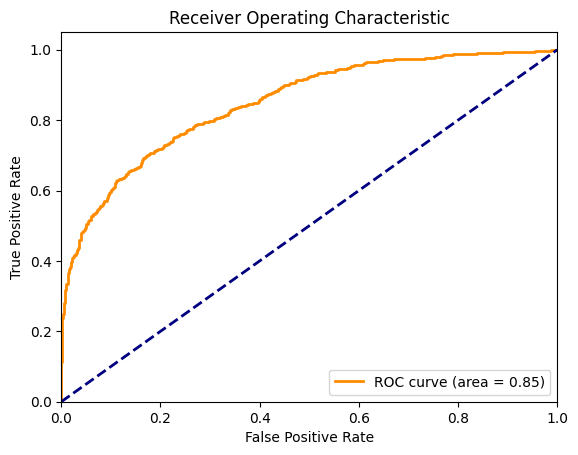

In [15]:
from sklearn.metrics import classification_report
# 예측
y_pred = cat.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

auc_plot(cat, X_test, y_test)

In [16]:
# param_grid = {
#     'depth': [2,3,4],
#     'learning_rate': [0.05, 0.1, 0.5],
#     'iterations': [50, 100, 150],
# }

# grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print('최적의 파라미터 :', grid_search.best_params_)

In [17]:
# 최적의 파라미터 : {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

cat = CatBoostClassifier(random_state=42, depth=4, iterations=100, learning_rate=0.1)

cat.fit(X_train, y_train)

0:	learn: 0.6464634	total: 3.47ms	remaining: 344ms
1:	learn: 0.6053348	total: 6.75ms	remaining: 331ms
2:	learn: 0.5745701	total: 8.11ms	remaining: 262ms
3:	learn: 0.5467781	total: 10.7ms	remaining: 257ms
4:	learn: 0.5238689	total: 13.3ms	remaining: 253ms
5:	learn: 0.5037690	total: 14.8ms	remaining: 232ms
6:	learn: 0.4861531	total: 16ms	remaining: 212ms
7:	learn: 0.4710029	total: 17.3ms	remaining: 199ms
8:	learn: 0.4580213	total: 18.8ms	remaining: 190ms
9:	learn: 0.4468045	total: 20.5ms	remaining: 185ms
10:	learn: 0.4368222	total: 21.9ms	remaining: 177ms
11:	learn: 0.4281312	total: 24.7ms	remaining: 181ms
12:	learn: 0.4208029	total: 26ms	remaining: 174ms
13:	learn: 0.4155846	total: 26.9ms	remaining: 165ms
14:	learn: 0.4089106	total: 27.8ms	remaining: 158ms
15:	learn: 0.4035765	total: 28.9ms	remaining: 152ms
16:	learn: 0.3992297	total: 29.8ms	remaining: 146ms
17:	learn: 0.3945264	total: 30.6ms	remaining: 139ms
18:	learn: 0.3909941	total: 31.7ms	remaining: 135ms
19:	learn: 0.3877919	total

              precision    recall  f1-score   support

           0     0.8724    0.9699    0.9185      2389
           1     0.7907    0.4452    0.5696       611

    accuracy                         0.8630      3000
   macro avg     0.8315    0.7075    0.7441      3000
weighted avg     0.8557    0.8630    0.8475      3000



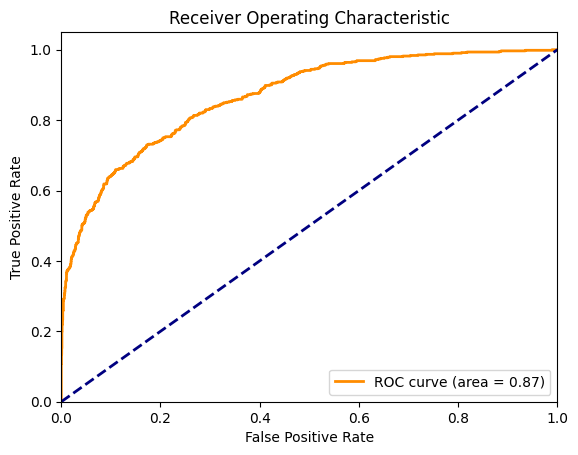

In [18]:
y_pred = cat.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

auc_plot(cat, X_test, y_test)